In [9]:
##Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

def getMax(arr):
    maxVal = -1
    index = -1
    for i in range(len(arr)):
        if(maxVal < arr[i]):
            maxVal = arr[i]
            index = i
    return {'index': index,
           'maximum_value': maxVal}

def getF1(trainSize, testMean):
    max_test = getMax(testMean)
    index = max_test['index']
    maxValue = max_test['maximum_value']
    optimalTrainSize = trainSize[index]
    conclusion = f'With the train size of {optimalTrainSize} yields the f1 score of {maxValue}.'
    return conclusion

def prediction(df, xTrain, yTrain, xTest, yTest):
    output = {}
    start = time.time()
    df.fit(xTrain, yTrain)
    test_pred = df.predict(xTest)
    cRep = classification_report(yTest, test_pred, digits=4)
    f1Score = f1_score(yTest, test_pred)
    end = time.time()
    wallClockPred = end - start
    outputUpdate = (('classification_report', cRep), ('f1_score', f1Score), ('wall_clock', wallClockPred))
    output.update(outputUpdate)
    return output

def printPredictions(pred):
    print('Time spent for prediction: ', pred['wall_clock'])
    print(pred['classification_report'])
    print('f1-Score: ', pred['f1_score'])


##load the file and update the column names
##https://archive.ics.uci.edu/ml/datasets/Heart+Disease data source
df = pd.read_csv('/Users/jacobseo/cs7641/assignment1/data/processed.cleveland.data', header=None)

df.columns = ['age','sex','chestPain','restingBloodPressure','cholesterol','fastingBloodSugar','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

messy_df = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]
clean_df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
##data Split to independent variable
X = clean_df.drop('num', axis=1).copy()

y = clean_df['num'].copy()

## category attriutes into binary format
pd.get_dummies(X, columns=['chestPain']).head()

X_encoded = pd.get_dummies(X, columns=['chestPain', 'restecg','slope','thal'])
#X_encoded.head()

y_nonZeroIndex = y > 0
y[y_nonZeroIndex] = 1
#y.unique()

X.head()

,age,sex,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    1.5s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    2.9s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    4.3s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    5.6s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    6.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    8.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    9.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:   11.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:   12.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.3s finished


'With the train size of 267 yields the f1 score of 0.8069285761462973.'

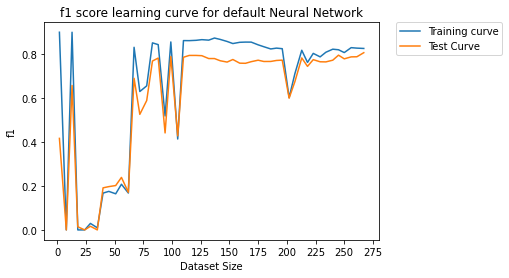

In [10]:
##Default learning Curve
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(random_state=42), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("f1 score learning curve for default Neural Network")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

getF1(train_sizes, test_mean)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

params = {
    'hidden_layer_sizes': [(2,),(4,),(8,),(5,5),(10,10),(50,50),(30,70),(70,30)],
    'alpha': [0.7, 0.5, 0.3, 0.2],
}

gs = GridSearchCV(MLPClassifier(random_state=42, max_iter=2000), param_grid=params, cv=10, n_jobs=-1, verbose=10, return_train_score=True, scoring='f1')
gs.fit(X_train, y_train)

##Best results
optimal_params = gs.best_params_
best_score= gs.best_score_
print('optimal_params::', optimal_params)
print('best_score::', best_score)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
optimal_params:: {'alpha': 0.2, 'hidden_layer_sizes': (50, 50)}
best_score:: 0.7776237994816537


In [12]:
results_data = pd.DataFrame(gs.cv_results_)
optimal_results_data = results_data.loc[results_data['param_alpha']==0.2]
optimal_results_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
24,0.076565,0.004153,0.005351,0.000808,0.2,"(2,)","{'alpha': 0.2, 'hidden_layer_sizes': (2,)}",0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.120355,0.004828,0.004941,0.000549,0.2,"(4,)","{'alpha': 0.2, 'hidden_layer_sizes': (4,)}",0.300000,0.476190,0.631579,...,0.378049,0.387500,0.414634,0.387879,0.392638,0.407186,0.390244,0.417178,0.397778,0.012350
26,0.339514,0.017509,0.004711,0.000528,0.2,"(8,)","{'alpha': 0.2, 'hidden_layer_sizes': (8,)}",0.647059,0.647059,0.666667,...,0.634812,0.634812,0.639456,0.639456,0.639456,0.639456,0.639456,0.639456,0.638033,0.001873
27,0.166915,0.090189,0.005146,0.000803,0.2,"(5, 5)","{'alpha': 0.2, 'hidden_layer_sizes': (5, 5)}",0.210526,0.555556,0.375000,...,0.261438,0.226950,0.298701,0.292683,0.567901,0.325000,0.296296,0.325000,0.308225,0.092663
28,0.032480,0.002675,0.005142,0.000582,0.2,"(10, 10)","{'alpha': 0.2, 'hidden_layer_sizes': (10, 10)}",0.400000,0.600000,0.666667,...,0.590038,0.568093,0.565574,0.589552,0.605166,0.602230,0.596774,0.589552,0.585941,0.014836
29,1.745891,0.312398,0.004932,0.000260,0.2,"(50, 50)","{'alpha': 0.2, 'hidden_layer_sizes': (50, 50)}",0.761905,0.700000,0.869565,...,0.890110,0.952381,0.972973,0.923077,0.914894,0.921466,0.952381,0.941176,0.932831,0.023245
30,1.766477,0.268994,0.005087,0.002503,0.2,"(30, 70)","{'alpha': 0.2, 'hidden_layer_sizes': (30, 70)}",0.782609,0.636364,0.869565,...,0.918033,0.946237,0.946809,0.865169,0.946809,0.939891,0.978261,0.957447,0.935898,0.028675
31,0.154282,0.313138,0.005538,0.001658,0.2,"(70, 30)","{'alpha': 0.2, 'hidden_layer_sizes': (70, 30)}",0.666667,0.592593,0.782609,...,0.616216,0.938144,0.657277,0.625000,0.666667,0.627907,0.672811,0.690909,0.684388,0.087854


(0.0, 1.0)

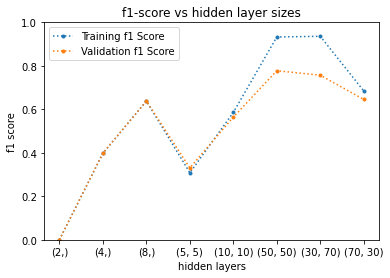

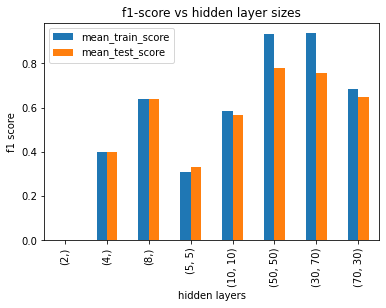

In [13]:
##Grid Search Plotting
fig, ax = plt.subplots()
optimal_results_data.plot(x='param_hidden_layer_sizes', y='mean_train_score', label='Training f1 Score', ax=ax, marker='.', ls=':')
optimal_results_data.plot(x='param_hidden_layer_sizes', y='mean_test_score', label='Validation f1 Score', ax=ax, marker='.', ls=':')

#results_data[:8].plot(x='param_hidden_layer_sizes', y=['mean_train_score','mean_test_score'], kind='bar')
#results_data[:8].plot(x='param_hidden_layer_sizes', y=['mean_fit_time', 'mean_score_time'], kind='line')
#ax.set_ylabel('f1 score')

f1_score = optimal_results_data[:8].plot(x='param_hidden_layer_sizes', y=['mean_train_score','mean_test_score'], kind='bar')
f1_score.set_ylabel('f1 score')
f1_score.set_xlabel('hidden layers')
f1_score.set_title('f1-score vs hidden layer sizes')

ax.set_title('f1-score vs hidden layer sizes')
ax.set_xlabel('hidden layers')
ax.set_ylabel('f1 score')
ax.set_ylim(bottom=0.0, top=1.0)

In [14]:
#learning Curve
#best param = {'alpha': 0.2, 'hidden_layer_sizes': (50, 50)}
optimal_df = MLPClassifier(random_state=42, max_iter=2000, alpha=0.2, hidden_layer_sizes=(50,50))
train_sizes, train_scores, test_scores = learning_curve(optimal_df, X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)

[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    4.7s remaining:   51.7s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:   11.5s remaining:   50.5s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:   18.3s remaining:   45.3s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:   23.4s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:   28.2s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:   33.2s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:   39.3s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:   44.4s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:   49.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.3s finished


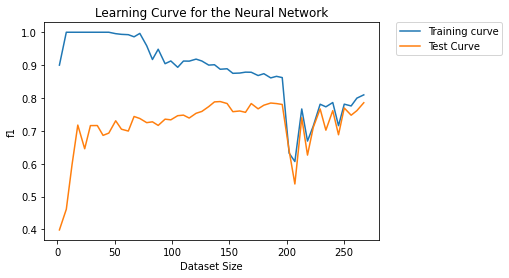

In [15]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("Learning Curve for the Neural Network")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)